In [ ]:
import matplotlib.font_manager as fm
import os
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')

# 한글폰터 적용
current_directory = "/content/drive/MyDrive/Colab Notebooks"
font_path = os.path.join(current_directory, "NanumBarunGothic.ttf")

if os.path.exists(font_path):
    fm.fontManager.addfont(font_path)
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc("font", family=font_prop.get_name())
    plt.rcParams["axes.unicode_minus"] = False # 마이너스 부호 출력 설정

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


시각적 탐색, 다중공선성, 표준화, 로그변환, 이상치탐지, 교차검증.

데이터셋은 여러 개의 특성(피처)과 타겟 변수로 구성됩니다. 각 행은 하나의 지리적 블록 그룹(일종의 작은 행정 구역)에 해당하며, 각 특성은 해당 블록 그룹의 통계적 정보입니다.

특성(피처)
- MedInc: 블록 그룹의 중간 소득 (단위: $10,000)
- HouseAge: 블록 그룹 내 주택의 중간 연령
- AveRooms: 가구당 평균 방 수
- AveBedrms: 가구당 평균 침실 수
- Population: 블록 그룹 내 인구 수
- AveOccup: 가구당 평균 인원 수
- Latitude: 블록 그룹의 위도
- Longitude: 블록 그룹의 경도

타겟 변수
- MedHouseVal: 블록 그룹의 중간 주택 가격 (단위: $100,000)

Task1_0729. Target Column의 분포를 확인하고 다음 사항을 수행하세요.

- Target을 로그변환 및 X 변수들을 표준화한 후 모델 학습 및 평가
- 이상치 여부를 파악한 후 처리하고 모델 학습 및 평가
- 이상치 처리 전후에 대한 모델 평가 결과 비교 설명

In [ ]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 데이터 로드
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df_a = df.copy()

df['MedHouseVal'] = housing.target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: >

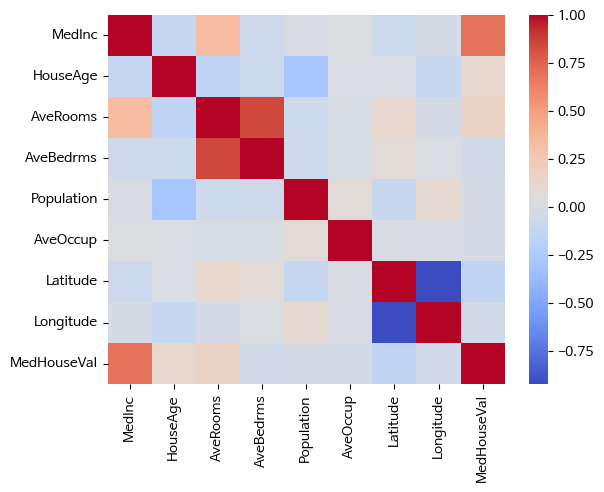

In [ ]:
import seaborn as sns
# 시각적탐색
sns.heatmap(df.corr(), cmap='coolwarm')

In [ ]:
# 다중공선성 'AveRooms', 'AveBedrms' 결합 / Latitude 삭제
df['AveRoomBed'] = df['AveRooms'] * df['AveBedrms']
df.drop(['AveRooms', 'AveBedrms'], axis=1, inplace=True)

# Latitude, Longitude 삭제
df.drop(['Latitude'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Target을 로그변환 및 X 변수들을 표준화한 후 모델 학습 및 평가
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_log = np.log1p(y)

<Axes: >

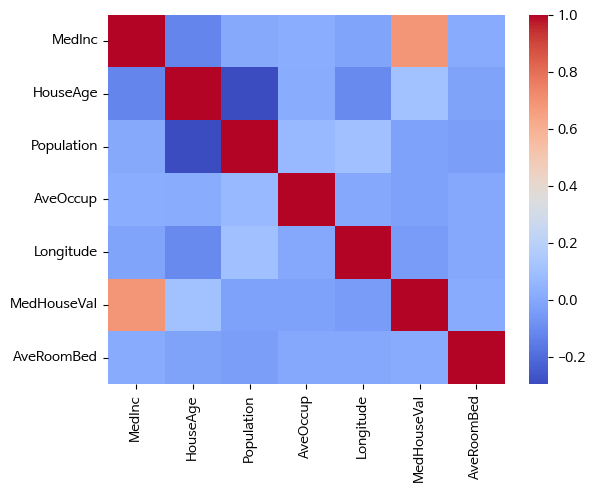

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), cmap='coolwarm')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   Population   20640 non-null  float64
 3   AveOccup     20640 non-null  float64
 4   Longitude    20640 non-null  float64
 5   MedHouseVal  20640 non-null  float64
 6   AveRoomBed   20640 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# 회귀모델 평가 함수
def train_and_valuate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    n = X_test.shape[0]
    k = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores).mean()

    print('계수:', model.coef_)
    print('절편:', model.intercept_)
    print(f'MSE: {mse:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'R^2: {r2:.4f}')
    print(f'adjusted_r2: {adjusted_r2:.4f}')
    print(f'CV RMSE: {cv_rmse:.4f}')

In [ ]:
from sklearn.linear_model import LinearRegression

# 모델학습 및 평가
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)
model = LinearRegression()

train_and_valuate(model, X_train, X_test, y_train, y_test)

MSE: 0.0503
MAE: 0.1679
RMSE: 0.2244
R^2: 0.6006
adjusted_r2: 0.5998
CV RMSE: 0.7459


#### 이상치 처리 여부 판단
평균 제곱 오차(MSE)가 향상(감소)되지만 이상값을 제거한 후 R-제곱 점수가 약간 나빠지는 것을 관찰하면 이는 회귀 모델에 대한 이상값의 미묘한 영향을 나타낸다.

최선의 조치를 해석하고 결정하는 방법

MSE 및 R-제곱 이해:

- MSE는 관찰된 실제 결과와 모델 예측 간의 평균 제곱 차이를 측정. MSE가 낮을수록 평균 오류가 더 작다는 것을 의미하므로 더 나은 적합성을 나타낸다.
- R-제곱은 독립 변수에서 예측 가능한 종속 변수의 분산 비율을 측정. 이는 실제 값에 대한 예측 세트의 적합도를 나타낸다. 그러나 R-제곱이 더 높다고 해서 반드시 모델이 더 좋다는 의미는 아니다.

이상치의 영향:
- 이상값을 제거하면 대부분의 데이터 포인트에 대해 모델이 더 정확해져서 MSE가 줄어들 수 있다. 그러나 이상치가 데이터의 특정 측면(이상치가 아님)을 나타내는 경우 이를 제거하면 모델의 일반화가 어려워져 R-제곱이 약간 낮아질 수 있다.

결정...

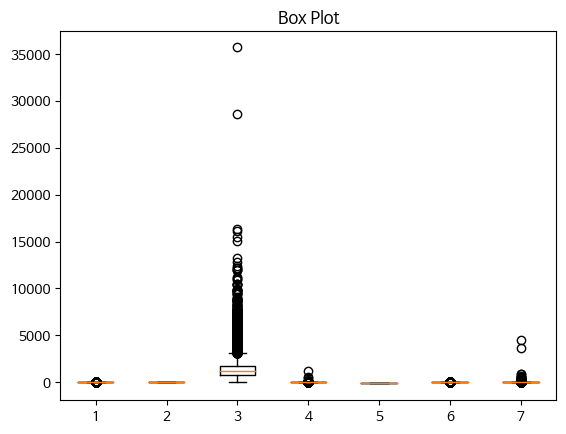

In [ ]:
# 이상치 여부를 파악
import pandas as pd
import matplotlib.pyplot as plt

plt.boxplot(df)
plt.title("Box Plot")
plt.show()

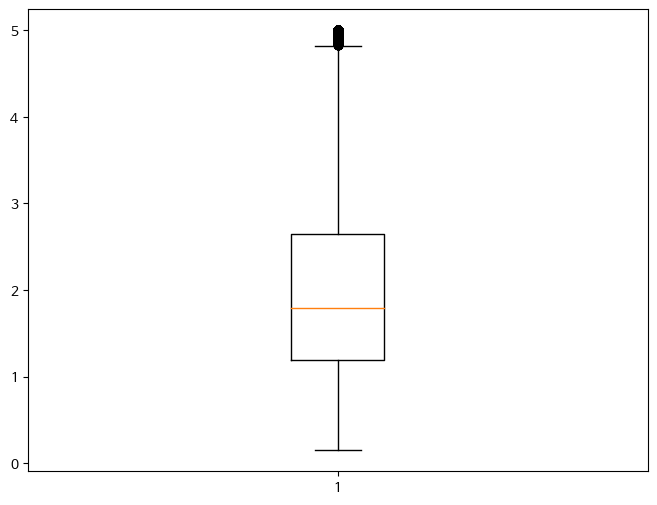

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(y)
plt.show()

In [ ]:
# 이상치 처리
Q1 = df_a['MedHouseVal'].quantile(0.25)
Q3 = df_a['MedHouseVal'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df[(df['MedHouseVal'] < lower_bound) | (df['MedHouseVal'] > upper_bound)]

# Output the observations corresponding to outliers
print(len(outliers))
outliers[:5]

df_no_outliers = df[(df['MedHouseVal'] >= lower_bound) & (df['MedHouseVal'] <= upper_bound)]
df_no_outliers.info()

1071
<class 'pandas.core.frame.DataFrame'>
Index: 19569 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       19569 non-null  float64
 1   HouseAge     19569 non-null  float64
 2   AveRooms     19569 non-null  float64
 3   AveBedrms    19569 non-null  float64
 4   Population   19569 non-null  float64
 5   AveOccup     19569 non-null  float64
 6   Latitude     19569 non-null  float64
 7   Longitude    19569 non-null  float64
 8   MedHouseVal  19569 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


#### 이상치 처리 여부 판단
평균 제곱 오차(MSE)가 향상(감소)되지만 이상값을 제거한 후 R-제곱 점수가 약간 나빠지는 것을 관찰하면 이는 회귀 모델에 대한 이상값의 미묘한 영향을 나타낸다.

최선의 조치를 해석하고 결정하는 방법

MSE 및 R-제곱 이해:

- MSE는 관찰된 실제 결과와 모델 예측 간의 평균 제곱 차이를 측정. MSE가 낮을수록 평균 오류가 더 작다는 것을 의미하므로 더 나은 적합성을 나타낸다.
- R-제곱은 독립 변수에서 예측 가능한 종속 변수의 분산 비율을 측정. 이는 실제 값에 대한 예측 세트의 적합도를 나타낸다. 그러나 R-제곱이 더 높다고 해서 반드시 모델이 더 좋다는 의미는 아니다.

이상치의 영향:
- 이상값을 제거하면 대부분의 데이터 포인트에 대해 모델이 더 정확해져서 MSE가 줄어들 수 있다. 그러나 이상치가 데이터의 특정 측면(이상치가 아님)을 나타내는 경우 이를 제거하면 모델의 일반화가 어려워져 R-제곱이 약간 낮아질 수 있다.

결정 기준:
- 모델 목적: 모델의 목적이 일반적인 사례를 정확하게 예측하는 것이고 이상값이 드물거나 예외적인 경우에는 낮은 MSE에 우선순위를 두는 것이 더 적절할 수 있다.
- 데이터 표현: 이상값이 실제 값이고 데이터의 중요한 변동을 나타내는 경우 더 높은 MSE에도 불구하고 모든 데이터에서 모델 예측 능력의 무결성을 유지하려면 이상값을 유지해야 할 수 있다.

도메인 지식:
- 도메인을 이해하면 이상값이 변칙인지 아니면 데이터의 필수 부분인지에 대한 통찰력을 얻을 수 있다. 예를 들어, 부동산에서는 가치가 매우 높은 부동산이 드물지만 여전히 고려해야 할 중요한 자산이다.
대체 접근 방식:

결론적으로 이상값을 제거하거나 유지하는 결정은 통계적 증거, 모델의 목적, 도메인 지식, 모델 사용에 대한 실제 고려 사항의 조합을 기반으로 해야 한다. 모든 경우에 적용되는 일률적인 답변은 없으며, 종종 가장 좋은 접근 방식은 여러 요소를 고려하고 도메인 전문가와 상담하는 것이다.

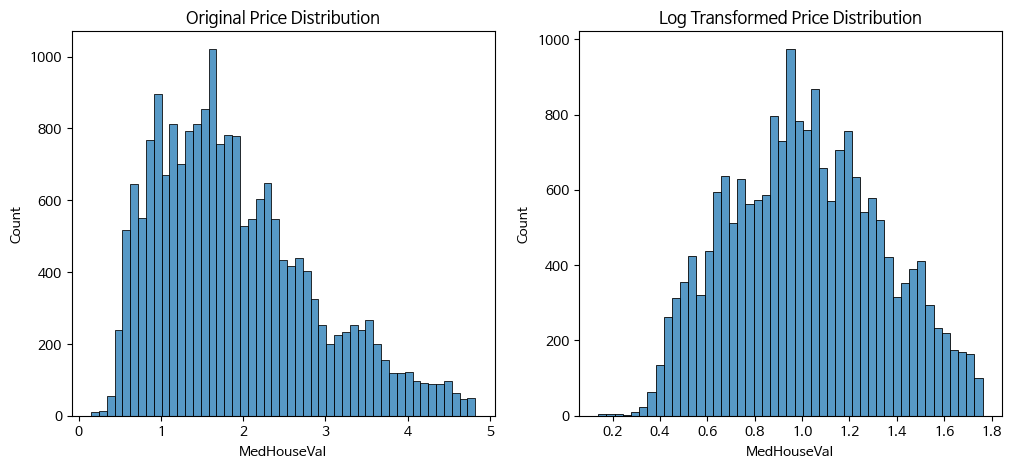

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1행 2열의 서브플롯 생성
fig, axs = plt.subplots(figsize=(12, 5), ncols=2, nrows=1)

# 원래 PRICE의 분포
sns.histplot(df_no_outliers['MedHouseVal'], ax=axs[0])
axs[0].set_title('Original Price Distribution')

# 로그 변환된 PRICE의 분포
y_log = np.log1p(df_no_outliers['MedHouseVal'])
sns.histplot(y_log, ax=axs[1])
axs[1].set_title('Log Transformed Price Distribution')

# 그래프 표시
plt.show()

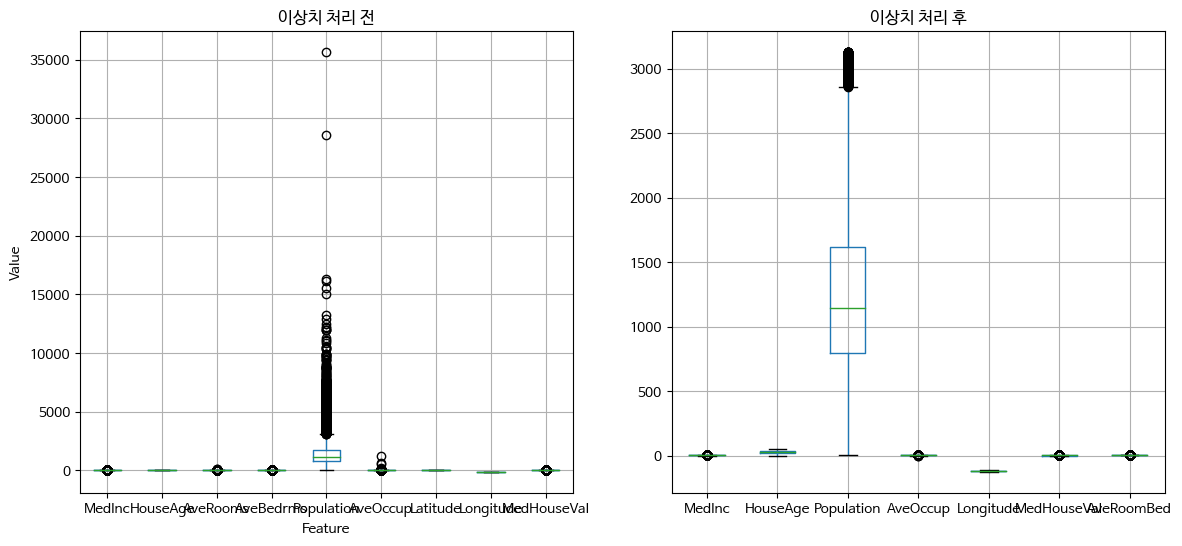

In [ ]:
# 이상치 처리 전후에 대한 모델 평가 결과 비교 설명
# df 이상치 처리 전 / df_a 이상치 처리 후
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# 이상치 처리 전
plt.subplot(1, 2, 1)
df.boxplot()
plt.title('이상치 처리 전')
plt.xlabel('Feature')
plt.ylabel('Value')

# 이상치 처리 후
plt.subplot(1, 2, 2)
df_a.boxplot()
plt.title('이상치 처리 후')

plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   Population   20640 non-null  float64
 3   AveOccup     20640 non-null  float64
 4   Longitude    20640 non-null  float64
 5   MedHouseVal  20640 non-null  float64
 6   AveRoomBed   20640 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


In [ ]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
df_a['MedHouseVal'] = housing.target

df_a['AveRoomBed'] = df_a['AveRooms'] * df_a['AveBedrms']
df_a.drop(['AveRooms', 'AveBedrms'], axis=1, inplace=True)
df_a.drop(['Latitude'], axis=1, inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 전처리(표준화, 로그변환, 다중공선성, 이상치 처리)
Q1 = df_a.quantile(0.25)
Q3 = df_a.quantile(0.75)
IQR = Q3 - Q1
df_a = df_a[~((df_a < (Q1 - 1.5 * IQR)) | (df_a > (Q3 + 1.5 * IQR))).any(axis=1)]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_log = np.log1p(y)

X = df_a.drop('MedHouseVal', axis=1)
y = df_a['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)

# 교차 검증의 평균 MSE 및 RMSE 계산
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -np.mean(cv_scores)
cv_rmse = np.sqrt(cv_mse)
print(f'교차 검증 평균 MSE: {cv_mse:.4f}')
print(f'교차 검증 평균 RMSE: {cv_rmse:.4f}')
print()

# 이상치 제거 후 모델 평가
model = LinearRegression()
train_and_valuate(model, X_train, X_test, y_train, y_test)

교차 검증 평균 MSE: 0.0448
교차 검증 평균 RMSE: 0.2116

계수: [ 0.2317273   0.06219783  0.03173616 -0.07876657  0.00590123 -0.05683559]
절편: 1.0018284037790999
MSE: 0.0430
MAE: 0.1638
RMSE: 0.2072
R^2: 0.5392
adjusted_r2: 0.5383
CV RMSE: 0.6449



Task2_0729. alphas = [0, 0.1, 1, 10, 100]와 같이 주어졌을 때 다음을 수행하세요.
- alpha값에 따른 평균 RMSE
- alpha값에 따른 회귀계수의 변화

In [ ]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name="Boston", version=1, parser='auto')
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Price'] = boston.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  Price    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [ ]:
# 필요한 feature, 카테고리->숫자형 dtype 변환
for col in df.columns:
    if df[col].dtype.name == 'category':
        df[col] = df[col].cat.codes.astype(float) # 카테고리 타입 -> 수치형 변환 (cat.codes)

In [ ]:
# 릿지 회귀 함수
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def ridge_regression(X, y, alphas):
    for alpha in alphas:
        ridge = Ridge(alpha=alpha)
        neg_mse_score = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
        rmse_scores = np.sqrt(-1 * neg_mse_score)
        avg_rmse = np.mean(rmse_scores)
        n = X_test.shape[0]
        k = X_test.shape[1]
        adjusted_r2 = 1 - (1 - avg_rmse) * (n - 1) / (n - k - 1)

        print(f'alpha:{alpha}')
        print(f'Negative MSE score:', np.round(neg_mse_score,3))
        print(f'RMSE score:', np.round(rmse_scores,3))
        print(f'RMSE:', np.round(avg_rmse,4))
        print(f'adjusted_r2: {adjusted_r2:.4f}')
        print('')


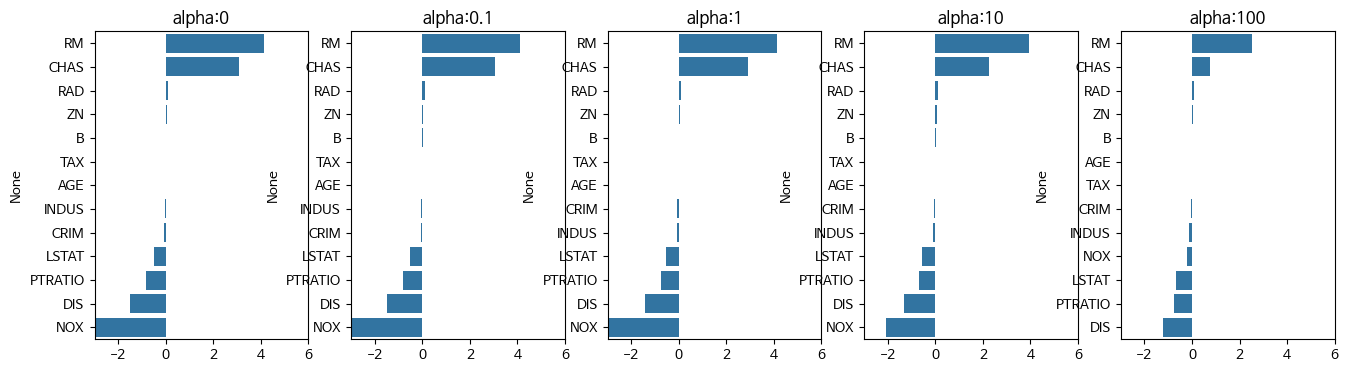

In [ ]:
# alpha 값이 증가하면서 회귀 계수가 지속적으로 작아짐
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(16,4), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X,y)

    coeff = pd.Series(data=ridge.coef_, index=X.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

In [ ]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,4.113720,4.118217,4.133037,3.948086,2.506996
CHAS,3.083844,3.064099,2.926289,2.241946,0.743225
RAD,0.097228,0.096776,0.094484,0.094287,0.099261
ZN,0.042019,0.042188,0.043162,0.045368,0.049593
B,0.008355,0.008411,0.008710,0.009040,0.008208
TAX,0.001546,0.001373,0.000422,-0.000939,-0.001055
AGE,-0.004222,-0.005011,-0.009245,-0.013267,-0.000336
INDUS,-0.054296,-0.057680,-0.076297,-0.103658,-0.119831
CRIM,-0.065053,-0.064891,-0.063989,-0.062459,-0.058398
LSTAT,-0.515940,-0.517093,-0.524246,-0.550883,-0.658937


In [ ]:
import warnings
warnings.filterwarnings('ignore')
#  alpha값에 따른 평균 RMSE
alphas = [0, 0.1, 1, 10, 100]

X = df.drop('Price', axis=1)
y = df['Price']

ridge_regression(X, y, ridge_alphas)

alpha:0
Negative MSE score: [-12.669 -26.743 -35.541 -85.533 -21.566]
RMSE score: [3.559 5.171 5.962 9.248 4.644]
RMSE: 5.7169
adjusted_r2: 5.7260

alpha:0.1
Negative MSE score: [-12.55  -26.568 -35.094 -85.388 -21.502]
RMSE score: [3.543 5.154 5.924 9.241 4.637]
RMSE: 5.6997
adjusted_r2: 5.7088

alpha:1
Negative MSE score: [-12.024 -26.691 -33.148 -84.504 -21.339]
RMSE score: [3.467 5.166 5.757 9.193 4.619]
RMSE: 5.6407
adjusted_r2: 5.6496

alpha:10
Negative MSE score: [-11.771 -28.005 -32.521 -78.612 -20.685]
RMSE score: [3.431 5.292 5.703 8.866 4.548]
RMSE: 5.568
adjusted_r2: 5.5768

alpha:100
Negative MSE score: [-13.113 -31.629 -40.949 -56.7   -18.679]
RMSE score: [3.621 5.624 6.399 7.53  4.322]
RMSE: 5.4992
adjusted_r2: 5.5079

